In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from  keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]

In [3]:
train_path = '/content/drive/MyDrive/Colab Notebooks/DeepLearningPractice/CNN/Train'
test_path = '/content/drive/MyDrive/Colab Notebooks/DeepLearningPractice/CNN/Test'

In [4]:
vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top=False) ##include_top = False means remove the last layer of VGG16

58900480/58889256 [==============================] - 0s 0us/step


In [5]:
for layer in vgg.layers:
  layer.trainable = False ##No need to train the VGG16 layers

In [6]:
folder = glob(train_path + '/*')

In [7]:
x = Flatten()(vgg.output)

In [8]:
prediction = Dense(len(folder), activation='softmax')(x)

In [9]:
model = Model(inputs=vgg.input, outputs=prediction)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy']
              )

In [13]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 50 images belonging to 4 classes.
Found 30 images belonging to 4 classes.


In [14]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
2/2 [==============================] - 75s 41s/step - loss: 1.9398 - accuracy: 0.3917 - val_loss: 4.0127 - val_accuracy: 0.2333
Epoch 2/5
2/2 [==============================] - 47s 36s/step - loss: 2.9049 - accuracy: 0.4074 - val_loss: 1.0166 - val_accuracy: 0.6000
Epoch 3/5
2/2 [==============================] - 43s 32s/step - loss: 1.1286 - accuracy: 0.5133 - val_loss: 1.8720 - val_accuracy: 0.2667
Epoch 4/5
2/2 [==============================] - 43s 32s/step - loss: 1.0289 - accuracy: 0.5904 - val_loss: 2.0811 - val_accuracy: 0.2667
Epoch 5/5
2/2 [==============================] - 48s 36s/step - loss: 0.2955 - accuracy: 0.8778 - val_loss: 2.4992 - val_accuracy: 0.3000


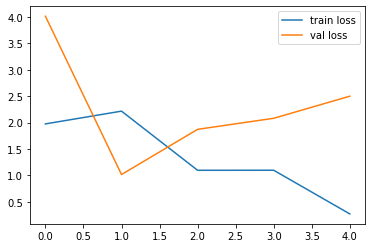

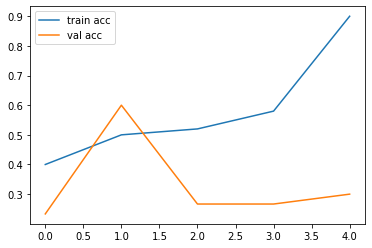

In [17]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [18]:
import tensorflow as tf
from keras.models import load_model
model.save('facefeatures_new_model.h5')